In [1]:
from lattice.ensemble import Ensemble
from lattice.protein_config import ProteinConfig
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

proteins = ['HHHHHHHHHH', 'HPHPPHPPHH', 'HPPHPPHPHH', 'PPPPPPHPPH', 'PPPPPHHHHH', 'PPPPPPPPPP']
ensembles = [Ensemble(protein) for protein in proteins]

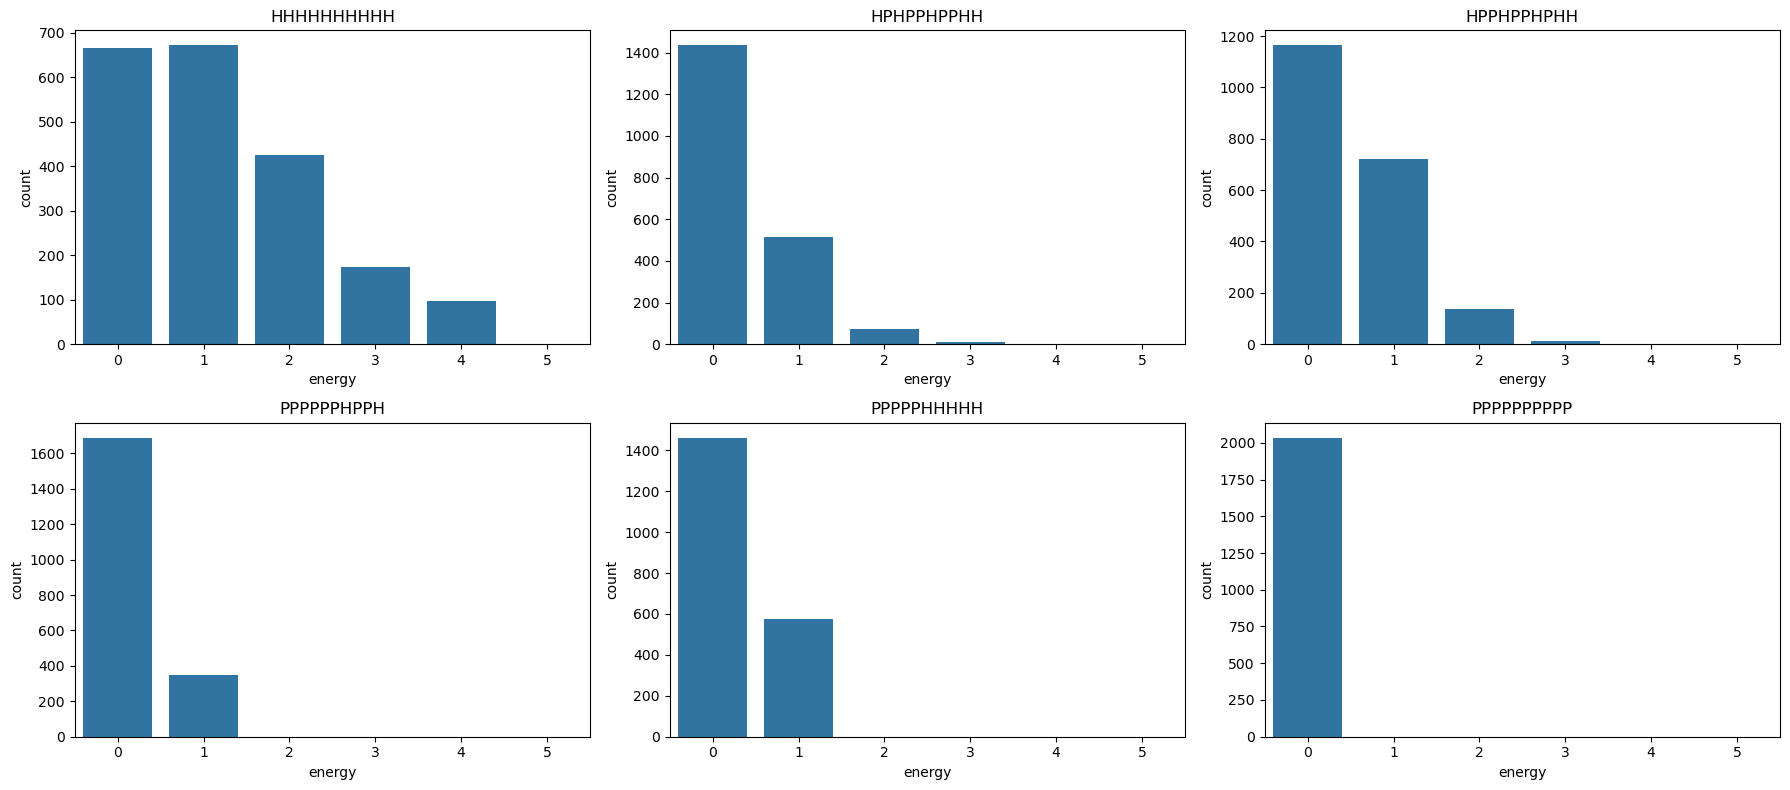

In [2]:
################
### Figure 2 ###
################

n = len(ensembles)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.flatten()

for ax, ens in zip(axes, ensembles):
    sns.barplot(data=ens.degeneracies_df, x="count", y="energy", ax=ax)
    ax.set_title(ens.protein_string)
    ax.set_xlabel("energy")
    ax.set_ylabel("count")
    
plt.tight_layout()
plt.show()

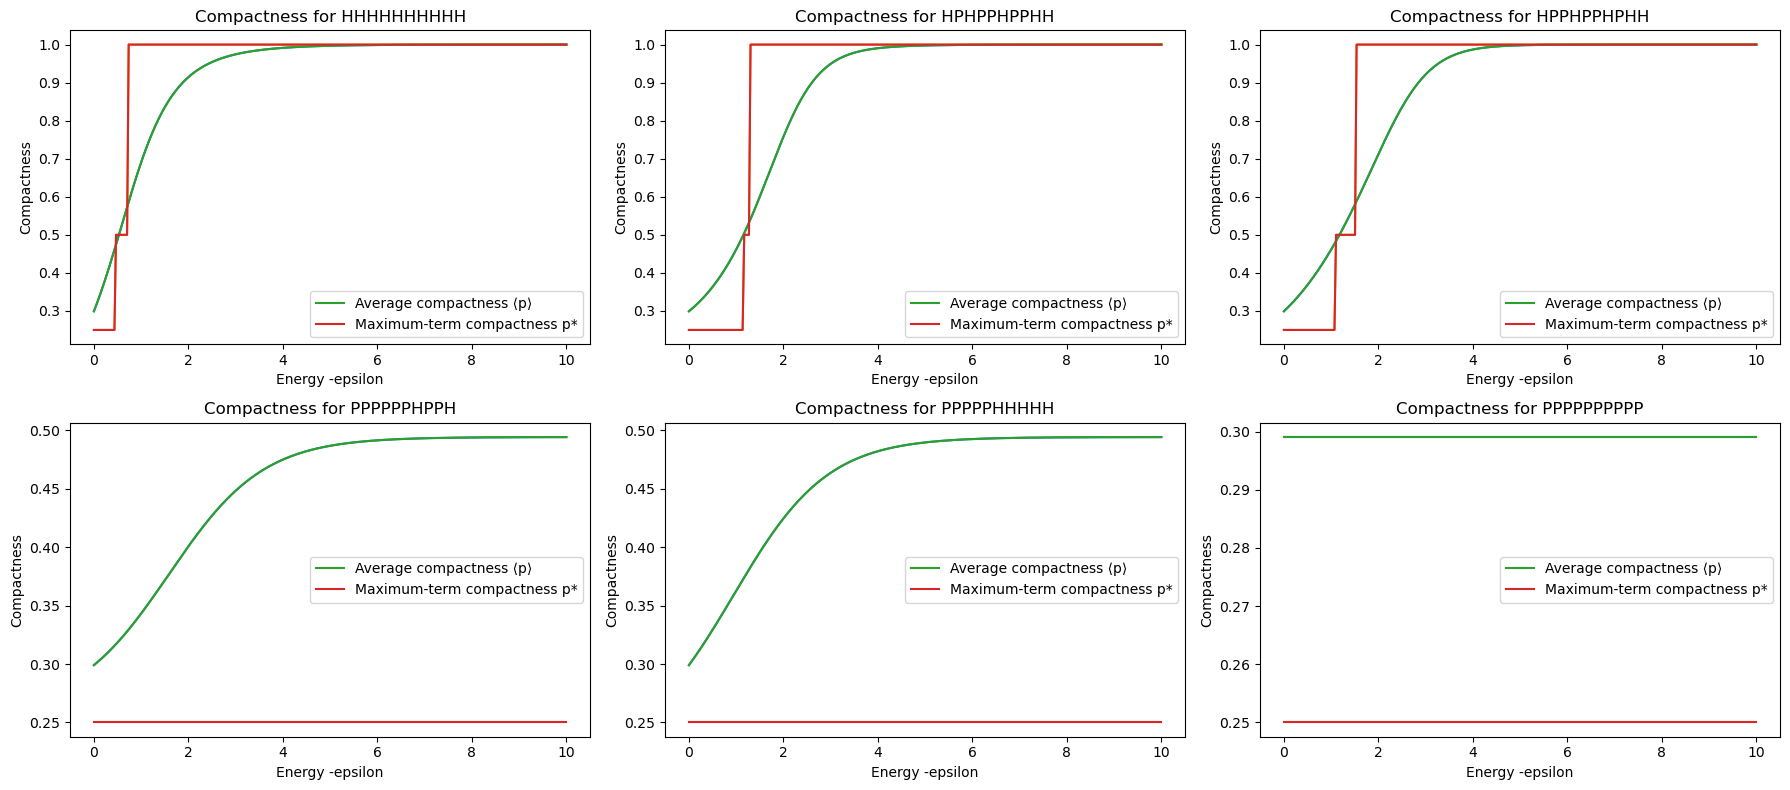

In [3]:
################
### Figure 3 ###
################

n = len(ensembles)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, ens in zip(axes, ensembles):
    L = len(ens.protein_string)
    xs = np.linspace(0, L, 300)

    ys = [ens.p_average_compactness(-x) for x in xs]
    ys_max = [ens.p_maximum_term(-x) for x in xs]

    ax.plot(xs, ys)
    ax.plot(xs, ys_max)
    ax.plot(xs, ys, label="Average compactness ⟨p⟩")
    ax.plot(xs, ys_max, label="Maximum-term compactness p*")
    
    ax.set_xlabel("Energy -epsilon")
    ax.set_ylabel("Compactness")
    ax.set_title(f"Compactness for {ens.protein_string}")
    ax.legend()  # ← Add legend for this subplot

plt.tight_layout()
plt.show()

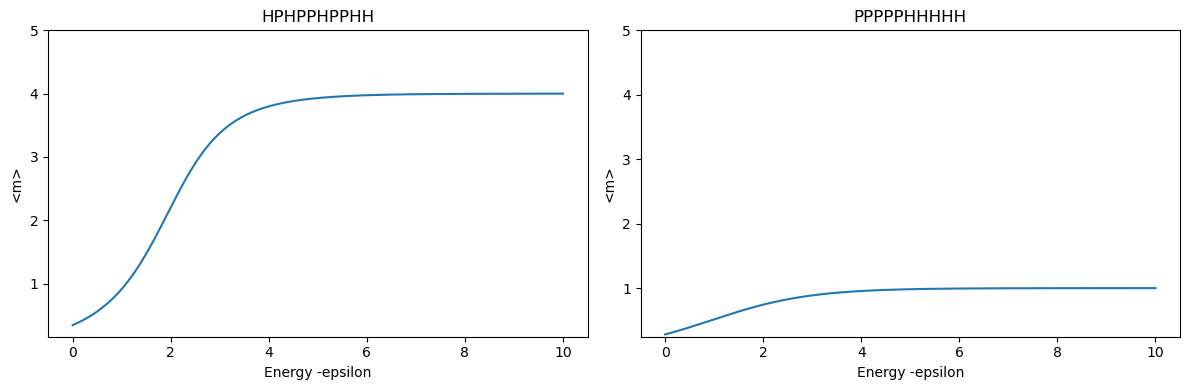

In [4]:
###################
### FIgure 4a,e ###
###################

n = len(ensembles)
cols = 2
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, ens in zip(axes, [ensembles[1], ensembles[4]]):
    L = len(ens.protein_string)
    xs = np.linspace(0, L, 300)

    ys = [ens.m_average_molecule_energy(-x) for x in xs]

    ax.plot(xs, ys)
    
    ax.set_xlabel("Energy -epsilon")
    ax.set_ylabel("<m>")
    ax.set_title(f"{ens.protein_string}")
    ax.set_ylim(top=5)

plt.tight_layout()
plt.show()

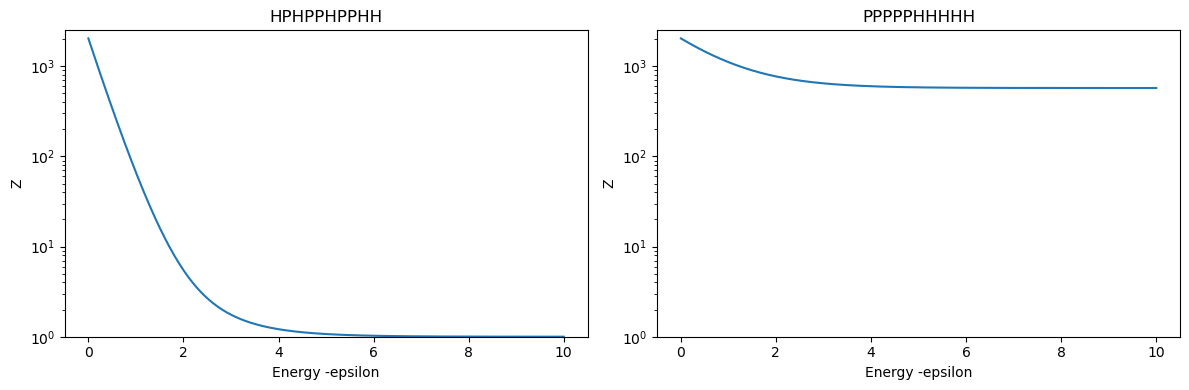

In [18]:
###################
### FIgure 4b,f ###
###################

n = len(ensembles)
cols = 2
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, ens in zip(axes, [ensembles[1], ensembles[4]]):
    L = len(ens.protein_string)
    xs = np.linspace(0, L, 300)

    ys = [ens.z_partition_function(epsilon=-x) for x in xs]

    ax.plot(xs, ys)
    ax.set_yscale("log")
    ax.set_xlabel("Energy -epsilon")
    ax.set_ylabel("Z")
    ax.set_title(f"{ens.protein_string}")
    ax.set_ylim(bottom=1, top=2500)

plt.tight_layout()
plt.show()

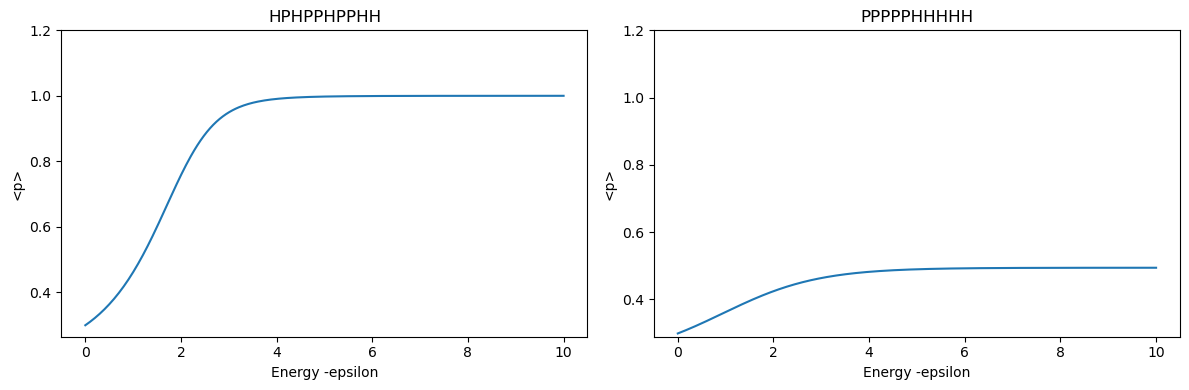

In [9]:
###################
### FIgure 4c,g ###
###################

n = len(ensembles)
cols = 2
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, ens in zip(axes, [ensembles[1], ensembles[4]]):
    L = len(ens.protein_string)
    xs = np.linspace(0, L, 300)

    ys = [ens.p_average_compactness(-x) for x in xs]

    ax.plot(xs, ys)
    
    ax.set_xlabel("Energy -epsilon")
    ax.set_ylabel("<p>")
    ax.set_title(f"{ens.protein_string}")
    ax.set_ylim(top=1.2)

plt.tight_layout()
plt.show()

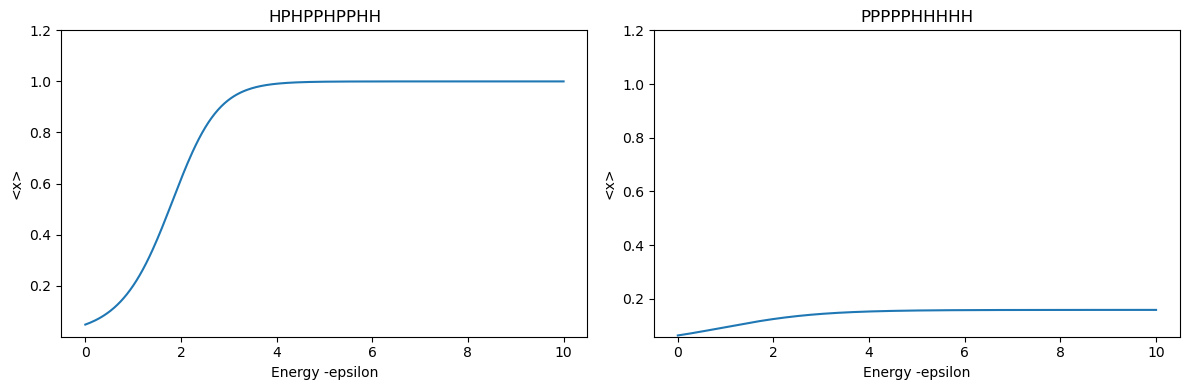

In [8]:
###################
### FIgure 4d,h ###
###################

n = len(ensembles)
cols = 2
rows = 1

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, ens in zip(axes, [ensembles[1], ensembles[4]]):
    L = len(ens.protein_string)
    xs = np.linspace(0, L, 300)

    ys = [ens.avg_x(-x) for x in xs]

    ax.plot(xs, ys)
    
    ax.set_xlabel("Energy -epsilon")
    ax.set_ylabel("<x>")
    ax.set_title(f"{ens.protein_string}")
    ax.set_ylim(top=1.2)

plt.tight_layout()
plt.show()